### Analyse Simulation Output with PPO and Different Reward Functions

### Imports & Installations

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import ast

### Initial Tests

In [3]:
# define folder to gaher data from
inputdir = '../src/data/model_outputs/'

In [ ]:
for file in os.listdir(inputdir):
    main_df = pd.DataFrame()
    main_df = pd.read_csv(inputdir + file)
    main_df = main_df[['step', 'system_total_waiting_time']]
    plt.size = (30, 20)
    plt.xlabel('Time step (seconds)')
    plt.ylabel('Total waiting time (s)')
    plt.plot(main_df['step'], main_df['system_total_waiting_time'])
    plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8', 'ep9', 'ep10'])
plt.show()

In [16]:
episode1 = pd.read_csv(inputdir + 'ppo_withPT_conn0_ep1.csv')


,step,system_total_stopped,system_total_waiting_time,system_mean_waiting_time,system_mean_speed,cluster_1743822458_1743822558_1743822643_1743822689_1743822737_8039877991_cluster_1120310798_1634545540_1665161322_1665161338_1665161344_1743822496_1743822510_1743822551_1743822648_1743822650_1743822666_1743822667_1743822676_1743822687_1754245066_1756301705_1949670169_2004844603_297701075_412123597_412123598_412123601_412181181_stopped,cluster_1743822458_1743822558_1743822643_1743822689_1743822737_8039877991_cluster_1120310798_1634545540_1665161322_1665161338_1665161344_1743822496_1743822510_1743822551_1743822648_1743822650_1743822666_1743822667_1743822676_1743822687_1754245066_1756301705_1949670169_2004844603_297701075_412123597_412123598_412123601_412181181_accumulated_waiting_time,cluster_1743822458_1743822558_1743822643_1743822689_1743822737_8039877991_cluster_1120310798_1634545540_1665161322_1665161338_1665161344_1743822496_1743822510_1743822551_1743822648_1743822650_1743822666_1743822667_1743822676_1743822687_1754245066_1756301705_1949670169_2004844603_297701075_412123597_412123598_412123601_412181181_average_speed,agents_total_stopped,agents_total_accumulated_waiting_time,TimeLimit.truncated,episode,terminal_observation
0,0.0,0,0.0,0.000000,0.000000,0,0.0,1.000000,0,0.0,NaN,NaN,NaN
1,5.0,12,1.0,0.021277,3.343570,0,0.0,1.000000,0,0.0,False,NaN,NaN
2,10.0,13,8.0,0.080000,5.200692,0,0.0,1.000000,0,0.0,False,NaN,NaN
3,15.0,20,33.0,0.215686,5.431543,0,0.0,1.000000,0,0.0,False,NaN,NaN
4,20.0,19,72.0,0.356436,5.862870,0,0.0,1.000000,0,0.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,980.0,6443,1059044.0,130.456270,0.982325,77,50342.0,0.015342,77,50342.0,False,NaN,NaN
197,985.0,6519,1066929.0,130.783158,0.971119,81,51458.0,0.013282,81,51458.0,False,NaN,NaN
198,990.0,6581,1077524.0,131.597948,0.951038,79,50587.0,0.012991,79,50587.0,False,NaN,NaN
199,995.0,6527,1086726.0,132.253377,0.979826,70,49595.0,0.019848,70,49595.0,False,NaN,NaN


In [22]:
episode1.system_total_waiting_time.mean()

285453.144278607

### Stable Baselines 3 PPO Output

In [2]:
# define folder to gaher data from
inputdir = '../src/data/model_outputs/'

['ep76']


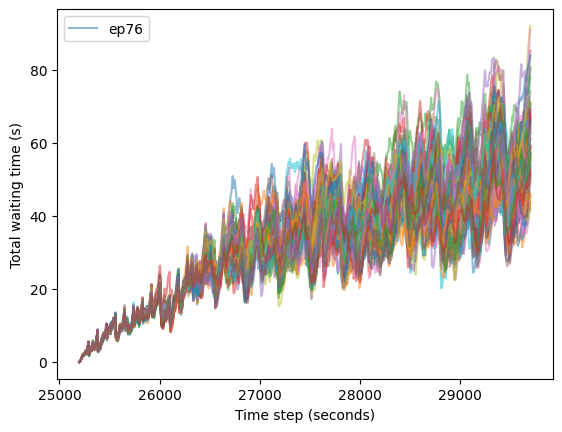

In [30]:
i = 0
for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        i += 1
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        main_df = main_df[['step', 'system_mean_waiting_time']]
        plt.size = (30, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Total waiting time (s)')
        plt.plot(main_df['step'], main_df['system_mean_waiting_time'], alpha=0.5)
        legend_list = []
        #print(i)
        legend_list.append(f'ep{i}')
print(legend_list)
plt.legend(legend_list)#['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

In [17]:
for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        i += 1
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)

In [76]:
main_df

,step,system_total_stopped,system_total_waiting_time,system_mean_waiting_time,system_mean_speed,system_total_CO2,system_total_PMx,system_total_NOx,system_total_noise_emission,system_local_CO2,...,tls_161_accumulated_waiting_time,tls_161_average_speed,tls_161_braking,tls_161_controlled_lane_emission,tls_161_phase,tls_161_state,tls_161_program,tls_161_reward,agents_total_stopped,agents_total_accumulated_waiting_time
0,25200.0,0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,[],0,ggggggggggrrggggggggggg,online,-0.06,0,0.0
1,25205.0,3,1.0,0.100000,3.174046,4.247253e+04,5.852833,246.907245,513.962741,0.000000,...,0.0,1.0,0.0,[],0,ggggggggggrrggggggggggg,online,0.00,0,0.0
2,25210.0,3,6.0,0.333333,4.543489,1.066634e+05,14.097243,657.641744,965.304712,0.000000,...,0.0,1.0,0.0,[],0,ggggggggggrrggggggggggg,online,0.00,0,0.0
3,25215.0,3,15.0,0.600000,6.285408,1.838540e+05,21.867242,1074.700680,1388.206485,0.000000,...,0.0,1.0,0.0,[],0,gggggggrggrrrrrrrrrrgrr,online,0.00,0,0.0
4,25220.0,4,26.0,0.787879,5.624030,1.451824e+05,18.597625,825.847388,1728.170164,0.000000,...,0.0,1.0,0.0,[],0,gggggggrggrrrrrrrrrrgrr,online,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,53980.0,14461,3392946.0,224.134364,0.112172,4.630270e+07,6643.151926,240498.664715,757070.485976,478468.959253,...,17808.0,0.0,0.0,"{'CO2_emission': 153608.33333333328, 'CO_emiss...",0,ggggggggggrrggggggggggg,online,0.00,121,56255.0
5757,53985.0,14467,3396472.0,224.456252,0.110324,4.629140e+07,6640.512809,240265.322574,756805.496195,479192.772127,...,17808.0,0.0,0.0,"{'CO2_emission': 153608.33333333328, 'CO_emiss...",0,ggggggggggrrggggggggggg,online,0.00,124,56274.0
5758,53990.0,14480,3393019.0,224.228060,0.109989,4.630616e+07,6643.609306,240263.658815,756921.269440,476663.605095,...,17808.0,0.0,0.0,"{'CO2_emission': 153608.33333333328, 'CO_emiss...",0,ggggggggggrrggggggggggg,online,0.00,122,56284.0
5759,53995.0,14533,3397580.0,224.396011,0.099727,4.631744e+07,6649.011542,240433.244825,756922.093988,474797.148138,...,17808.0,0.0,0.0,"{'CO2_emission': 153608.33333333328, 'CO_emiss...",0,ggggggggggrrggggggggggg,online,0.00,120,55305.0


In [33]:
main_df.dtypes

step                                     float64
system_total_stopped                       int64
system_total_waiting_time                float64
system_mean_waiting_time                 float64
system_mean_speed                        float64
system_total_CO2                         float64
system_total_PMx                         float64
system_total_NOx                         float64
system_total_noise_emission              float64
system_local_CO2                         float64
system_local_PMx                         float64
system_local_NOx                         float64
system_local_noise_emission              float64
system_local_avg_speed                   float64
system_last_reward                       float64
total_brake_traffic_signals              float64
tls_159_stopped                            int64
tls_159_accumulated_waiting_time         float64
tls_159_average_speed                    float64
tls_159_braking                          float64
tls_159_controlled_l

In [42]:
test['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)

In [43]:
new = test['tls_159_controlled_lane_emission'].apply(pd.Series)

In [64]:
#new = new.dropna(how='all')
new = new.drop_duplicates()

,CO2_emission,CO_emission,HC_emission,PMx_emission,NOx_emission,emission_combined,fuel_consumption
17,60120.824096,79.541593,0.000000,9.473628,505.092386,12142.986340,18912.493444
18,66339.651789,85.805827,0.000000,10.010790,543.964816,13395.886644,20868.685845
19,40878.259765,57.430820,0.000000,6.912087,343.879090,8257.296352,12858.907625
37,7647.466555,103.226585,0.653466,0.150184,3.208589,1550.941076,2439.165493
38,3518.651937,0.000000,0.000000,0.000567,0.856114,703.901723,1122.319534
...,...,...,...,...,...,...,...
5743,330166.001572,10029.838388,65.812696,60.852381,2176.827703,68499.866548,104538.853947
5744,330037.554716,10013.195384,65.733185,60.844565,2176.744975,68470.814565,104497.881841
5745,330165.247975,10029.721440,65.812141,60.852329,2176.827188,68499.692215,104538.613558
5746,330166.111111,10029.855556,65.812778,60.852389,2176.827778,68499.891922,104538.888889


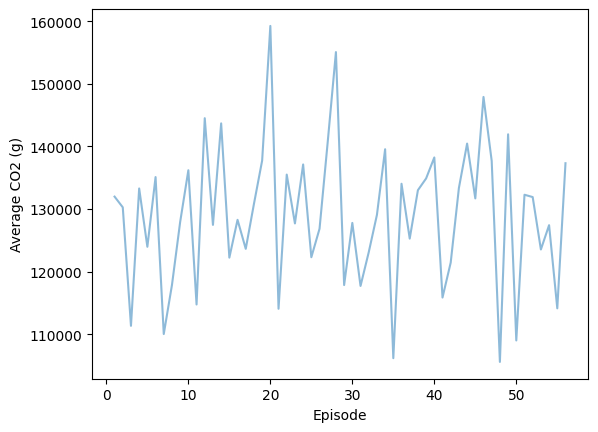

In [ ]:
import numpy as np

tls_159 = pd.DataFrame()
inputdir = '../src/data/model_outputs/'

# Initialize a list to store average CO2 emissions for each episode
avg_co2_emissions = []

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        
        # Calculate the average CO2 emission for this episode and add it to the list
        avg_co2_emissions.append(np.mean(tls_159['CO2_emission']))

# Plot the average CO2 emissions for each episode
#plt.figure(figsize=(60, 20))
plt.plot(range(1, len(avg_co2_emissions) + 1), avg_co2_emissions, alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Average CO2 (g)')
plt.show()

In [47]:
def plot_columns(df):
    plt.figure(figsize=(10,6))
    
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

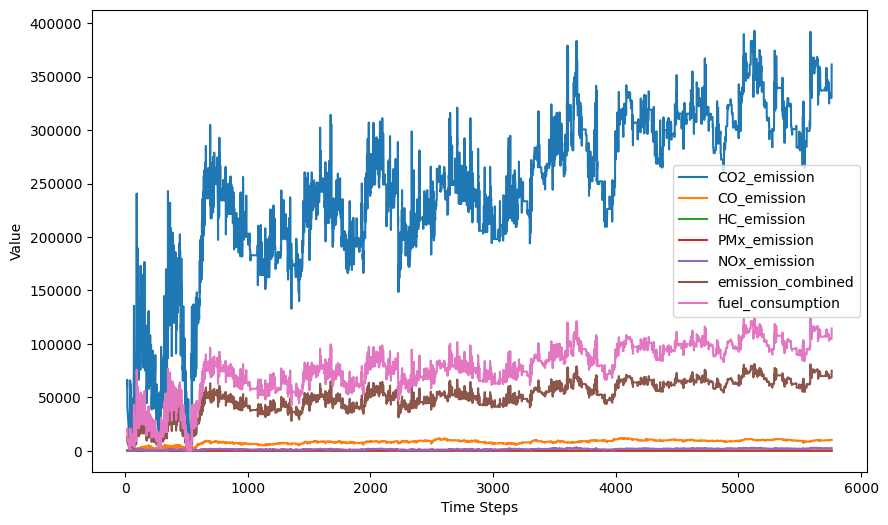

In [66]:
plot_columns(new)


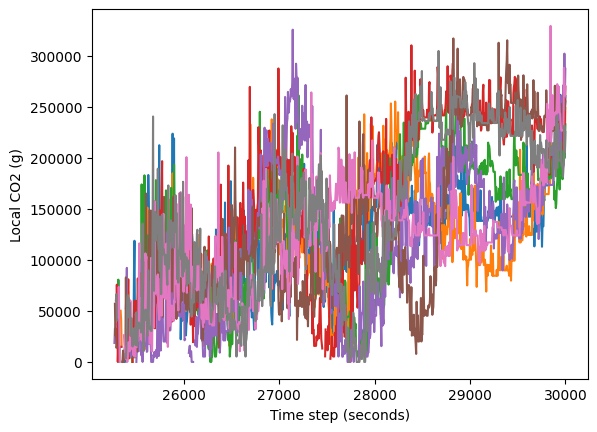

In [74]:
# plot local tls CO2 emission for each episode

tls_159 = pd.DataFrame()

inputdir = '../src/data/model_outputs/'

for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        main_df = main_df[main_df['step']<=30000]
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        plt.size = (60, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Local CO2 (g)')
        # for column in tls_159.columns:
        #     plt.plot(tls_159.index, tls_159[column])
        plt.plot(tls_159['step'], tls_159['CO2_emission'])
        # legend_list = []
        # print(i)
        # legend_list.append(f'ep{i}')
        # plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

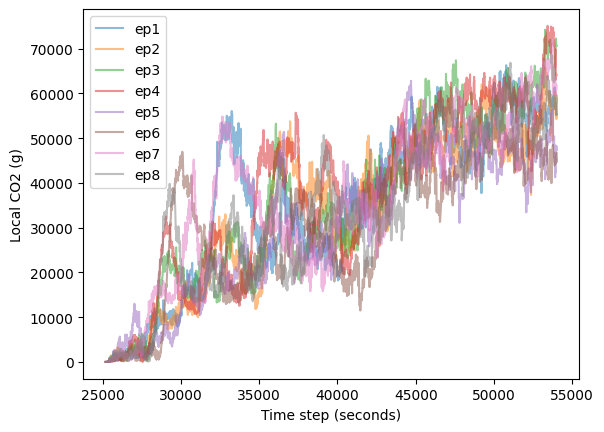

In [75]:
# plot local tls CO2 emission for each episode

tls_159 = pd.DataFrame()

inputdir = '../src/data/model_outputs/'

for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        #tls_159['tls_159_reward'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        #tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        #tls_159['steps'] = main_df['step']
        #tls_159 = tls_159.dropna(how='all')
        plt.size = (60, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Local CO2 (g)')
        # for column in tls_159.columns:
        #     plt.plot(tls_159.index, tls_159[column])
        plt.plot(main_df['step'], main_df['agents_total_accumulated_waiting_time'], alpha=0.5)
        # legend_list = []
        # print(i)
        # legend_list.append(f'ep{i}')
        plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

In [ ]:
# queue data

# plot local tls CO2 emission for each episode

tls_159 = pd.DataFrame()

inputdir = '../src/data/model_outputs/'

for file in os.listdir(inputdir):
    if file.startswith('queue'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        #main_df = main_df[main_df['step']<=30000]
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        plt.size = (60, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Local CO2 (g)')
        # for column in tls_159.columns:
        #     plt.plot(tls_159.index, tls_159[column])
        plt.plot(tls_159['step'], tls_159['CO2_emission'], alpha=0.5)
        # legend_list = []
        # print(i)
        # legend_list.append(f'ep{i}')
        # plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

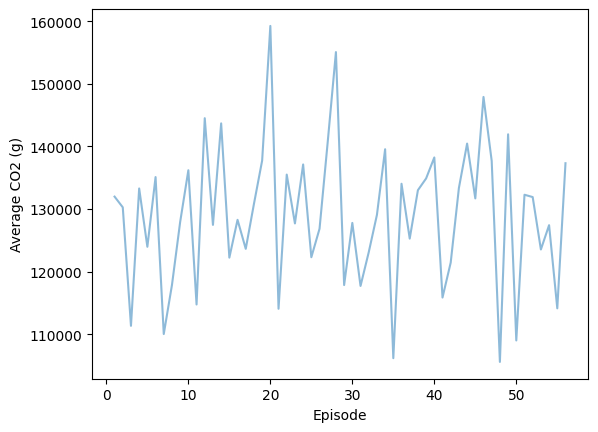

In [81]:
import numpy as np

tls_159 = pd.DataFrame()
inputdir = '../src/data/model_outputs/'

# Initialize a list to store average CO2 emissions for each episode
avg_co2_emissions = []

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        
        # Calculate the average CO2 emission for this episode and add it to the list
        avg_co2_emissions.append(np.mean(tls_159['CO2_emission']))

# Plot the average CO2 emissions for each episode
#plt.figure(figsize=(60, 20))
plt.plot(range(1, len(avg_co2_emissions) + 1), avg_co2_emissions, alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Average CO2 (g)')
plt.show()

In [94]:
# view all columns in dataframe
pd.set_option('display.max_columns', None)

In [95]:
main_df

,step,system_total_stopped,system_total_waiting_time,system_mean_waiting_time,system_mean_speed,system_total_CO2,system_total_PMx,system_total_NOx,system_total_noise_emission,system_local_CO2,system_local_PMx,system_local_NOx,system_local_noise_emission,system_local_avg_speed,system_last_reward,total_brake_traffic_signals,tls_159_stopped,tls_159_accumulated_waiting_time,tls_159_average_speed,tls_159_braking,tls_159_controlled_lane_emission,tls_159_phase,tls_159_state,tls_159_program,tls_159_reward,tls_160_stopped,tls_160_accumulated_waiting_time,tls_160_average_speed,tls_160_braking,tls_160_controlled_lane_emission,tls_160_phase,tls_160_state,tls_160_program,tls_160_reward,tls_161_stopped,tls_161_accumulated_waiting_time,tls_161_average_speed,tls_161_braking,tls_161_controlled_lane_emission,tls_161_phase,tls_161_state,tls_161_program,tls_161_reward,agents_total_stopped,agents_total_accumulated_waiting_time
0,25200.0,0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000,0.000000,[],0,GGGgrrrrrrgGgGGrrrGG,online,-42,0,0.0,1.000000,0.000000,[],0,rgGgGrrrrrrrrrrrGGrGGrG,online,-7,0,0.0,1.000000,0.000000,[],0,ggggggggggrrggggggggggg,online,-4,0,0.0
1,25205.0,3,1.0,0.100000,3.606116,5.276023e+04,6.686134,297.342218,524.453455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000,0.000000,[],0,GGGgrrrrrrgGgGGrrrGG,online,0,0,0.0,1.000000,0.000000,[],0,rgGgGrrrrrrrrrrrGGrGGrG,online,0,0,0.0,1.000000,0.000000,[],0,ggggggggggrrggggggggggg,online,0,0,0.0
2,25210.0,3,6.0,0.333333,5.068939,1.097898e+05,14.001480,644.206052,977.377044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000,0.000000,[],0,GGGgrrrrrrgGgGGrrrGG,online,0,0,0.0,1.000000,0.000000,[],0,rgGgGrrrrrrrrrrrGGrGGrG,online,0,0,0.0,1.000000,0.000000,[],0,ggggggggggrrggggggggggg,online,0,0,0.0
3,25215.0,3,16.0,0.640000,6.582069,1.650968e+05,20.034734,977.316858,1373.933181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000,0.000000,[],0,GGGgrrrrrrgGgGGrrrGG,online,0,0,0.0,1.000000,0.000000,[],0,rgGgGrrrrrrrrrrrrrrrrrr,online,0,0,0.0,1.000000,0.000000,[],0,ggggggggggrrggggggggggg,online,0,0,0.0
4,25220.0,6,31.0,0.939394,5.813063,1.383185e+05,18.625524,818.267968,1714.845639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,1.000000,0.000000,[],0,rrrrrrrrggrrrrrrGGGr,online,0,0,0.0,1.000000,0.000000,[],0,rgGgGrrrrrrrrrrrrrrrrrr,online,0,0,0.0,1.000000,0.000000,[],0,rrrrrrrgrrggrrrrrrggrrr,online,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,29680.0,744,60233.0,43.869629,3.194744,5.161868e+06,731.936724,30390.235578,70524.044444,137363.663654,21.156066,838.289975,1827.606540,0.250943,-10.000000,-1.132953,21,14883.0,0.026019,0.000000,"{'CO2_emission': 183200.87939681375, 'CO_emiss...",0,GGGgrrrrrrgGgGGrrrrr,online,-21,5,787.0,0.001570,-0.305142,"{'CO2_emission': 15228.976307812978, 'CO_emiss...",0,grrrrrGGgGGgrrrrrrrrrrr,online,-5,4,51.0,0.002125,-0.827810,"{'CO2_emission': 17832.14128292157, 'CO_emissi...",0,rrrrrrrgrrggrrrrrrggrrr,online,-4,30,15721.0
897,29685.0,774,61374.0,44.733236,3.224940,5.247981e+06,731.538384,30355.274478,70504.761407,144636.805229,21.616449,869.707722,1956.084843,1.184340,-8.666667,-7.562872,15,15400.0,0.086058,-3.494571,"{'CO2_emission': 189677.3251639562, 'CO_emissi...",0,GGGGrrrrrrrrrrrrrrrr,online,-15,6,442.0,0.095909,-3.965558,"{'CO2_emission': 15241.850774863007, 'CO_emiss...",0,grrrrrGGgGGgrrrrrrrrrrr,online,-6,5,99.0,0.153497,-0.102744,"{'CO2_emission': 19797.144122151105, 'CO_emiss...",0,rrrrrrrgrrggrrrrrrggrrr,online,-5,26,15941.0
898,29690.0,786,61225.0,44.592134,3.203477,5.324917e+06,751.713747,31236.786940,70642.074395,108060.108803,15.135731,567.174004,1866.076152,1.007481,-6.333333,-10.874907,14,14806.0,0.015156

<Figure size 4000x2000 with 0 Axes>

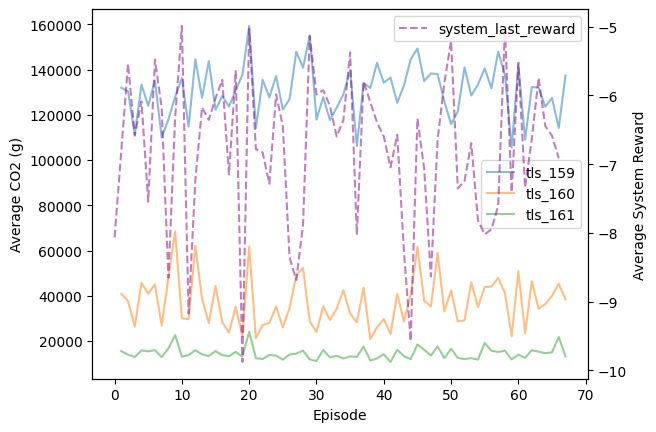

In [90]:

inputdir = '../src/data/model_outputs/'

# Initialize lists to store average CO2 emissions for each episode
avg_co2_emissions_159 = []
avg_co2_emissions_160 = []
avg_co2_emissions_161 = []
avg_sys_last_reward = []

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        main_df = pd.read_csv(inputdir + file)
        
        # Add calculation for avg_sys_last_reward
        avg_sys_last_reward.append(main_df['system_last_reward'].mean())
        
        # Process tls_159
        tls_159 = pd.DataFrame()
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        avg_co2_emissions_159.append(np.mean(tls_159['CO2_emission']))
        
        # Process tls_160
        tls_160 = pd.DataFrame()
        tls_160['tls_160_controlled_lane_emission'] = main_df['tls_160_controlled_lane_emission'].apply(ast.literal_eval)
        tls_160 = tls_160['tls_160_controlled_lane_emission'].apply(pd.Series)
        tls_160['step'] = main_df['step']
        tls_160 = tls_160.dropna(how='all')
        avg_co2_emissions_160.append(np.mean(tls_160['CO2_emission']))
        
        # Process tls_161
        tls_161 = pd.DataFrame()
        tls_161['tls_161_controlled_lane_emission'] = main_df['tls_161_controlled_lane_emission'].apply(ast.literal_eval)
        tls_161 = tls_161['tls_161_controlled_lane_emission'].apply(pd.Series)
        tls_161['step'] = main_df['step']
        tls_161 = tls_161.dropna(how='all')
        avg_co2_emissions_161.append(np.mean(tls_161['CO2_emission']))

# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(range(1, len(avg_co2_emissions_159) + 1), avg_co2_emissions_159, alpha=0.5, label='tls_159')
ax1.plot(range(1, len(avg_co2_emissions_160) + 1), avg_co2_emissions_160, alpha=0.5, label='tls_160')
ax1.plot(range(1, len(avg_co2_emissions_161) + 1), avg_co2_emissions_161, alpha=0.5, label='tls_161')

# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend(['tls_159', 'tls_160', 'tls_161'])

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
ax2.plot(avg_sys_last_reward, color='purple', linestyle='--', alpha=0.5, label='system_last_reward')

# Label for second graph
ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()


#plt.plot(range(1, len(avg_co2_emissions_159) + 1), avg_co2_emissions_159, alpha=0.5, label='tls_159')
#plt.plot(range(1, len(avg_co2_emissions_160) + 1), avg_co2_emissions_160, alpha=0.5, label='tls_160')
#plt.plot(range(1, len(avg_co2_emissions_161) + 1), avg_co2_emissions_161, alpha=0.5, label='tls_161')

#plt.xlabel('Episode')
#plt.ylabel('Average CO2 (g)')
#plt.legend(['tls_159', 'tls_160', 'tls_161'])
#plt.show()

In [88]:
import numpy as np

inputdir = '../src/data/model_outputs/'

# Initialize dictionaries to store minimum emissions for each episode
min_emissions_159 = {'CO2_emission': float('inf'), 'CO_emission': float('inf'), 'HC_emission': float('inf'), 'PMx_emission': float('inf'), 'NOx_emission': float('inf')}
min_emissions_160 = {'CO2_emission': float('inf'), 'CO_emission': float('inf'), 'HC_emission': float('inf'), 'PMx_emission': float('inf'), 'NOx_emission': float('inf')}
min_emissions_161 = {'CO2_emission': float('inf'), 'CO_emission': float('inf'), 'HC_emission': float('inf'), 'PMx_emission': float('inf'), 'NOx_emission': float('inf')}

# Initialize dictionaries to store episode with minimum emissions for each tls
min_episode_159 = {}
min_episode_160 = {}
min_episode_161 = {}

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        # Extract episode name from file name
        episode_name = file.split('_')[1]  # adjust this based on your file naming convention
        
        main_df = pd.read_csv(inputdir + file)
        
        # Process tls_159
        tls_159 = pd.DataFrame()
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        
        # Update minimum emissions and corresponding episode for tls_159
        for emission in min_emissions_159.keys():
            min_value = np.min(tls_159[emission])
            if min_value < min_emissions_159[emission] and min_value > 0:
                min_emissions_159[emission] = min_value
                min_episode_159[emission] = episode_name
        
        # Process tls_160
        tls_160 = pd.DataFrame()
        tls_160['tls_160_controlled_lane_emission'] = main_df['tls_160_controlled_lane_emission'].apply(ast.literal_eval)
        tls_160 = tls_160['tls_160_controlled_lane_emission'].apply(pd.Series)
        tls_160['step'] = main_df['step']
        tls_160 = tls_160.dropna(how='all')
        
        # Update minimum emissions and corresponding episode for tls_160
        for emission in min_emissions_160.keys():
            min_value = np.min(tls_160[emission])
            if min_value < min_emissions_160[emission] and min_value > 0:
                min_emissions_160[emission] = min_value
                min_episode_160[emission] = episode_name
        
        # Process tls_161
        tls_161 = pd.DataFrame()
        tls_161['tls_161_controlled_lane_emission'] = main_df['tls_161_controlled_lane_emission'].apply(ast.literal_eval)
        tls_161 = tls_161['tls_161_controlled_lane_emission'].apply(pd.Series)
        tls_161['step'] = main_df['step']
        tls_161 = tls_161.dropna(how='all')
        
        # Update minimum emissions and corresponding episode for tls_161
        for emission in min_emissions_161.keys():
            min_value = np.min
            
    # Print minimum emissions and corresponding episodes
print('Minimum emissions for tls_159:', min_emissions_159)
print('Episodes with minimum emissions for tls_159:', min_episode_159)
print('Minimum emissions for tls_160:', min_emissions_160)
print('Episodes with minimum emissions for tls_160:', min_episode_160)
print('Minimum emissions for tls_161:', min_emissions_161)
print('Episodes with minimum emissions for tls_161:', min_episode_161)

Minimum emissions for tls_159: {'CO2_emission': 1345.1091843756267, 'CO_emission': 10.4170887758214, 'HC_emission': inf, 'PMx_emission': 0.002605111555797454, 'NOx_emission': 0.2635750819185546}
Episodes with minimum emissions for tls_159: {'CO2_emission': '200000', 'PMx_emission': '200000', 'NOx_emission': '200000', 'CO_emission': '200000'}
Minimum emissions for tls_160: {'CO2_emission': inf, 'CO_emission': inf, 'HC_emission': inf, 'PMx_emission': inf, 'NOx_emission': inf}
Episodes with minimum emissions for tls_160: {}
Minimum emissions for tls_161: {'CO2_emission': inf, 'CO_emission': inf, 'HC_emission': inf, 'PMx_emission': inf, 'NOx_emission': inf}
Episodes with minimum emissions for tls_161: {}


In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('avg_speed'):
        # create dataframe for all files that start with avg_speed
        temp_df = pd.read_csv(os.path.join(inputdir, file))
        temp_df['episode'] = i
        df = df.append(temp_df, ignore_index=True)
        i += 1

In [6]:
df_grouped.system_last_reward

episode
1     0.335326
2     0.370231
3     0.335576
4     0.306631
5     0.305620
        ...   
79    0.310187
80    0.410490
81    0.417322
82    0.416298
83    0.399925
Name: system_last_reward, Length: 83, dtype: float64

In [5]:
# group dataframe by episode and get averages
df_grouped = df.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_24997/4275623981.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('episode').mean()


In [47]:
np.mean(df.system_local_CO2)

91988.95633249861

In [48]:
df.system_local_CO2.describe()

count     73199.000000
mean      91988.956332
std       55774.253360
min           0.000000
25%       52984.120075
50%       83283.678420
75%      120852.200323
max      395547.152681
Name: system_local_CO2, dtype: float64

<Figure size 4000x2000 with 0 Axes>

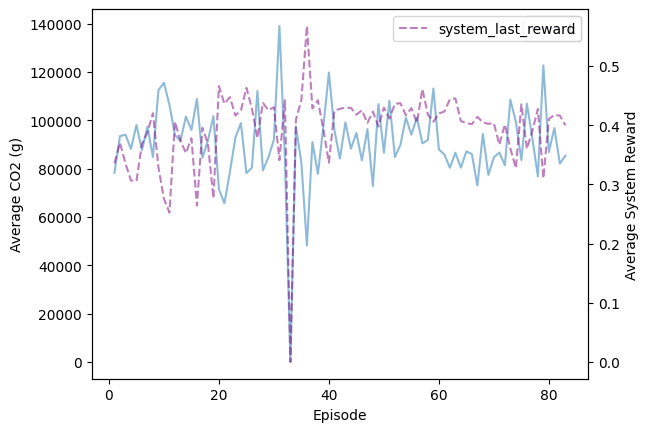

In [8]:
# plot local CO2 emission and last reward on two axis

# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(df_grouped['system_local_CO2'], alpha=0.5, label='CO2 emission')


# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend('Last Reward')

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
ax2.plot(df_grouped['system_last_reward'], color='purple', linestyle='--', alpha=0.5, label='system_last_reward')

# Label for second graph
ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()


In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df_queue = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('queue'):
        # create dataframe for all files that start with avg_speed
        temp_df_queue = pd.read_csv(os.path.join(inputdir, file))
        temp_df_queue['episode'] = i
        df_queue = df_queue.append(temp_df_queue, ignore_index=True)
        i += 1

In [11]:
grouped_queue = df_queue.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_24997/3505794712.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_queue = df_queue.groupby('episode').mean()


In [20]:
grouped_queue.system_local_CO2.describe()

count        76.000000
mean      97832.340416
std       13453.162162
min       69311.025228
25%       87821.952537
50%       98123.148930
75%      103998.018390
max      138066.016280
Name: system_local_CO2, dtype: float64

<Figure size 4000x2000 with 0 Axes>

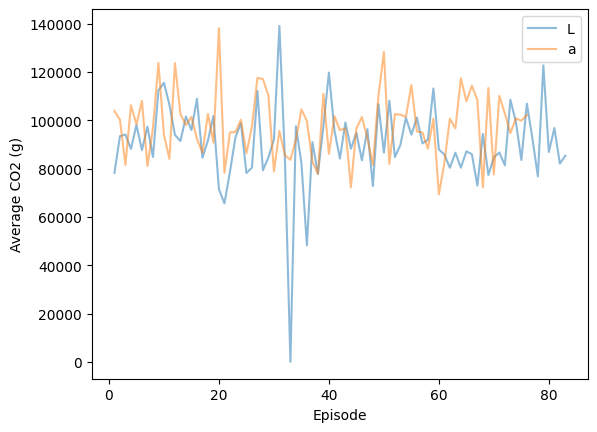

In [17]:
# plot local CO2 emission and last reward on two axis

# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(df_grouped['system_local_CO2'], alpha=0.5, label='speed CO2 emission')
ax1.plot(grouped_queue['system_local_CO2'], alpha=0.5, label='queue CO2 emission')


# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend('Last Reward')

# Create secondary y-axis
#ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
##ax2.plot(df_grouped['system_last_reward'], linestyle='--', alpha=0.5, label='speed_reward')
ax2.plot(grouped_queue['system_last_reward'], linestyle='--', alpha=0.5, label='queue_reward')

# Label for second graph
#ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()

In [39]:
# get episodes with highest reward and the respective local CO2 emission

df_grouped['system_local_CO2'][df_grouped['system_last_reward'] == df_grouped['system_last_reward'].max()]

episode
36    48171.403539
Name: system_local_CO2, dtype: float64

In [44]:
# get episodes with highest reward and the respective local CO2 emission

df_grouped['system_local_CO2'][df_grouped['system_last_reward'] == df_grouped['system_last_reward'].max()]

episode
36    48171.403539
Name: system_local_CO2, dtype: float64

In [40]:
# get episodes with highest reward and the respective local CO2 emission

grouped_queue['system_local_CO2'][grouped_queue['system_last_reward'] == grouped_queue['system_last_reward'].max()]

episode
60    69311.025228
Name: system_local_CO2, dtype: float64

#### Brake Reward

In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df_brake = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('minimizebrake'):
        # create dataframe for all files that start with avg_speed
        temp_df_brake = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake['episode'] = i
        df_brake = df_brake.append(temp_df_brake, ignore_index=True)
        i += 1

In [3]:
df_brake

,step,system_total_stopped,system_total_waiting_time,system_mean_waiting_time,system_mean_speed,system_total_CO2,system_total_PMx,system_total_NOx,system_total_noise_emission,system_local_CO2,...,tls_161_average_speed,tls_161_braking,tls_161_acceleration,tls_161_controlled_lane_emission,tls_161_phase,tls_161_state,tls_161_reward,agents_total_stopped,agents_total_accumulated_waiting_time,episode
0,25200.0,0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,[],0,ggggggggggrrggggggggggg,-5.104111,0,0.0,1
1,25205.0,3,1.0,0.100000,3.581038,4.944388e+04,6.558810,292.771976,518.935730,0.000000,...,1.0,0.0,0.0,[],0,ggggggggggrrggggggggggg,0.000000,0,0.0,1
2,25210.0,4,8.0,0.444444,5.309695,1.158864e+05,15.209722,730.295400,982.222165,0.000000,...,1.0,0.0,0.0,[],0,ggggggggggrrggggggggggg,0.000000,0,0.0,1
3,25215.0,3,18.0,0.720000,6.573078,1.837692e+05,21.667277,1063.179810,1377.058237,0.000000,...,1.0,0.0,0.0,[],0,ggggggggggrrggggggggggg,0.000000,0,0.0,1
4,25220.0,6,33.0,1.000000,5.745439,1.525943e+05,19.983617,918.453408,1726.844012,0.000000,...,1.0,0.0,0.0,[],0,ggggggggggrrggggggggggg,0.000000,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67788,29680.0,1,223939.0,102.395519,0.000000,7.702126e+06,1147.765811,44641.553020,113319.714701,173278.881355,...,0.0,0.0,0.0,"{'CO2_emission': 20997.777777777777, 'CO_emiss...",0,ggggggggggrrrrrrrrrrgrg,0.000000,51,27999.0,77
67789,29685.0,1,226460.0,103.453632,0.000000,7.617046e+06,1136.670418,43723.844929,113276.050148,176001.957310,...,0.0,0.0,0.0,"{'CO2_emission': 20997.777777777777, 'CO_emiss...",0,ggggggggggrrggggggggggg,0.000000,53,28083.0,77
67790,29690.0,1,228959.0,104.309339,0.000000,7.660967e+06,1145.296954,44242.927292,113613.896419,176002.222222,...,0.0,0.0,0.0,"{'CO2_emission': 20997.777777777777, 'CO_emiss...",0,ggggggggggrrggggggggggg,0.000000,53,28172.0,77
67791,29695.0,1,228668.0,104.129326,0.000000,7.820874e+06,1181.932253,45952.804942,113459.278108,175696.485285,...,0.0,0.0,0.0,"{'CO2_emission': 20997.777777777777, 'CO_emiss...",0,ggggggggggrrggggggggggg,0.000000,52,28222.0,77


In [4]:
df_brake.columns

Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 'system_total_CO2',
       'system_total_PMx', 'system_total_NOx', 'system_total_noise_emission',
       'system_local_CO2', 'system_local_CO', 'system_local_HC',
       'system_local_PMx', 'system_local_NOx', 'system_local_noise_emission',
       'system_local_#vehicles', 'system_local_avgSpeedsperType',
       'system_local_avg_speed', 'system_last_reward',
       'total_brake_traffic_signals', 'local_acceleration', 'tls_159_stopped',
       'tls_159_accumulated_waiting_time', 'tls_159_average_speed',
       'tls_159_braking', 'tls_159_acceleration',
       'tls_159_controlled_lane_emission', 'tls_159_phase', 'tls_159_state',
       'tls_159_reward', 'tls_160_stopped', 'tls_160_accumulated_waiting_time',
       'tls_160_average_speed', 'tls_160_braking', 'tls_160_acceleration',
       'tls_160_controlled_lane_emission', 'tls_160_phase', 'tls_160_state',
       '

In [8]:
df_brake[['system_last_reward', 'tls_159_reward', 'tls_160_reward', 'tls_161_reward']].describe()

,system_last_reward,tls_159_reward,tls_160_reward,tls_161_reward
count,6.779300e+04,67792.000000,67792.000000,67792.000000
mean,-7.371563e-01,-0.507758,-0.721464,-0.984887
std,9.831192e-01,1.446119,1.586325,1.842924
min,-1.199007e+01,-20.424822,-18.854722,-16.701687
25%,-1.251599e+00,-0.122631,-0.467049,-1.049269
50%,-2.641803e-01,0.000000,0.000000,0.000000
75%,-1.591609e-15,0.000000,0.000000,0.000000
max,0.000000e+00,0.000000,0.000000,0.000000


#### Speed Reward

In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df_speed = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('speed'):
        # create dataframe for all files that start with avg_speed
        temp_df_brake = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake['episode'] = i
        df_speed = df_speed.append(temp_df_brake, ignore_index=True)
        i += 1

In [11]:
df_speed[['system_last_reward', 'tls_159_reward', 'tls_160_reward', 'tls_161_reward']].describe()

,system_last_reward,tls_159_reward,tls_160_reward,tls_161_reward
count,67792.000000,67791.000000,67791.000000,67791.000000
mean,-0.407643,-0.509750,-0.368874,-0.345838
std,0.560291,1.052280,0.852627,0.828579
min,-5.275511,-12.466043,-8.921320,-9.311806
25%,-0.693630,-0.645032,-0.270925,-0.109168
50%,-0.210806,0.000000,0.000000,0.000000
75%,0.000000,0.000880,0.000000,0.000000
max,0.500000,0.518618,0.500000,0.500000


### Compare Training Performance of Different Reward Functions

#### Load Episode Data for each Reward Function: 
Speed, Queue, Brake, Brake + Acceleration, Diff Waiting Time, Combined Emission, Pressure, Speed + Brake (?)

In [4]:
inputdir = '../src/data/model_outputs/'

In [ ]:
# get all training episode data for different rewards

# counter for episodes
i_speed = 1
i_brake = 1
i_queue = 1
i_waitTime = 1
i_brake_accel = 1
i_pressure = 1
i_combinedEmission = 1
i_brake_speed = 1

# create dataframe for each reward type
df_speed = pd.DataFrame()
df_brake = pd.DataFrame()
df_queue = pd.DataFrame()
df_waitTime = pd.DataFrame()
df_brake_accel = pd.DataFrame()
df_pressure = pd.DataFrame()
df_combinedEmission = pd.DataFrame()
df_brake_speed = pd.DataFrame()

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('avg_speed'):
        temp_df_speed = pd.read_csv(os.path.join(inputdir, file))
        temp_df_speed['episode'] = i_speed # add episode column
        df_speed = df_speed.append(temp_df_speed, ignore_index=True)
        i_speed += 1
    # create dataframe for all files that start with minimizebrake
    elif file.startswith('minimizebrake'):
        temp_df_brake = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake['episode'] = i_brake # add episode column
        df_brake = df_brake.append(temp_df_brake, ignore_index=True)
        i_brake += 1
    # create dataframe for all files that start with queue
    elif file.startswith('queue'):
        temp_df_queue = pd.read_csv(os.path.join(inputdir, file))
        temp_df_queue['episode'] = i_queue # add episode column
        df_queue = df_queue.append(temp_df_queue, ignore_index=True)
        i_queue += 1
    # create dataframe for all files that start with waitingTime
    elif file.startswith('waitingTime'):
        temp_df_waitTime = pd.read_csv(os.path.join(inputdir, file))
        temp_df_waitTime['episode'] = i_waitTime # add episode column
        df_waitTime = df_waitTime.append(temp_df_waitTime, ignore_index=True)
        i_waitTime += 1
    # create dataframe for all files that start with brake_acceleration
    elif file.startswith('brake_acceleration'):
        temp_df_brake_accel = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake_accel['episode'] = i_brake_accel # add episode column
        df_brake_accel = df_brake_accel.append(temp_df_brake_accel, ignore_index=True)
        i_brake_accel += 1
    # create dataframe for all files that start with pressure
    elif file.startswith('pressure'):
        temp_df_pressure = pd.read_csv(os.path.join(inputdir, file))
        temp_df_pressure['episode'] = i_pressure
        df_pressure = df_pressure.append(temp_df_pressure, ignore_index=True)
        i_pressure += 1
    # create dataframe for all files that start with combined_emission
    elif file.startswith('combined_emission'):
        temp_df_combinedEmission = pd.read_csv(os.path.join(inputdir, file))
        temp_df_combinedEmission['episode'] = i_combinedEmission
        df_combinedEmission = df_combinedEmission.append(temp_df_combinedEmission, ignore_index=True)
        i_combinedEmission += 1
    # create dataframe for all files that start with speedbrake
    elif file.startswith('speedbrake'):
        temp_df_brake_speed = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake_speed['episode'] = i_brake_speed
        df_brake_speed = df_brake_speed.append(temp_df_brake_speed, ignore_index=True)
        i_brake_speed += 1


In [8]:
# get columns of dataframes

df_speed.columns

Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 'system_total_CO2',
       'system_total_PMx', 'system_total_NOx', 'system_total_noise_emission',
       'system_local_CO2', 'system_local_CO', 'system_local_HC',
       'system_local_PMx', 'system_local_NOx', 'system_local_noise_emission',
       'system_local_#vehicles', 'system_local_avgSpeedsperType',
       'system_local_avg_speed', 'system_last_reward',
       'total_brake_traffic_signals', 'local_acceleration', 'tls_159_stopped',
       'tls_159_accumulated_waiting_time', 'tls_159_average_speed',
       'tls_159_braking', 'tls_159_acceleration',
       'tls_159_controlled_lane_emission', 'tls_159_phase', 'tls_159_state',
       'tls_159_reward', 'tls_160_stopped', 'tls_160_accumulated_waiting_time',
       'tls_160_average_speed', 'tls_160_braking', 'tls_160_acceleration',
       'tls_160_controlled_lane_emission', 'tls_160_phase', 'tls_160_state',
       '

#### Compare emissions

##### CO2 Comparison

In [ ]:
# new dataframe with local emissions for each reward type 

local_CO2 = pd.DataFrame()

local_CO2['speed'] = df_speed.groupby('episode').mean()['system_local_CO2']
local_CO2['brake'] = df_brake.groupby('episode').mean()['system_local_CO2']
local_CO2['queue'] = df_queue.groupby('episode').mean()['system_local_CO2']
local_CO2['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_CO2']
local_CO2['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_CO2']
local_CO2['pressure'] = df_pressure.groupby('episode').mean()['system_local_CO2']
local_CO2['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_CO2']
local_CO2['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_CO2']


In [76]:
local_CO2.dropna(inplace=True) # drop episodes that are empty for some reward types

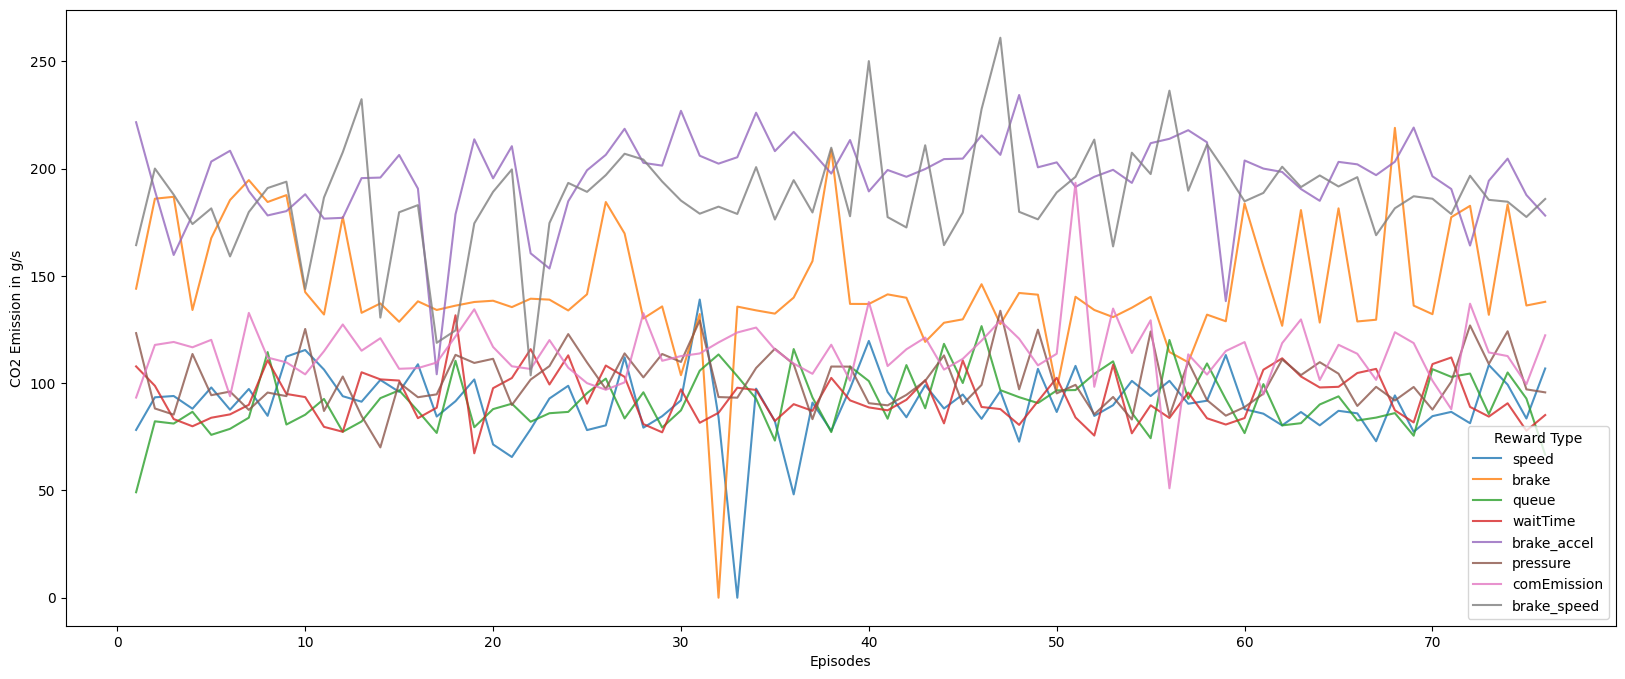

In [77]:
# get average CO2 emission across all episodes plot local CO2 emission for entire training process for each reward type in one figure

plt.figure(figsize=(20,8))

for column in local_CO2.columns:
       plt.plot(local_CO2.index, local_CO2[column]/1000, label=column, alpha=0.8) # divided by 1000 to get g from mg
       
plt.xlabel('Episodes')
plt.ylabel('CO2 Emission in g/s')  
plt.legend(title='Reward Type', fancybox=True)
plt.show()

In [54]:
# get mean of each reward types' average since the plots still overlap too much for clear identification

local_CO2.mean().sort_values()

speed_CO2           90355.704859
queue_CO2           91811.972172
waitTime_CO2        93255.203106
pressure_CO2       101394.440390
comEmission_CO2    114216.186017
brake_CO2          144240.212337
brake_speed_CO2    187045.259614
brake_accel_CO2    196410.770214
dtype: float64

##### PMx Comparison

In [ ]:
# new dataframe with local emissions for each reward type 

local_PMx = pd.DataFrame()

local_PMx['speed'] = df_speed.groupby('episode').mean()['system_local_PMx']
local_PMx['brake'] = df_brake.groupby('episode').mean()['system_local_PMx']
local_PMx['queue'] = df_queue.groupby('episode').mean()['system_local_PMx']
local_PMx['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_PMx']
local_PMx['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_PMx']
local_PMx['pressure'] = df_pressure.groupby('episode').mean()['system_local_PMx']
local_PMx['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_PMx']
local_PMx['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_PMx']


In [79]:
local_PMx.dropna(inplace=True) # drop empty episodes after 76

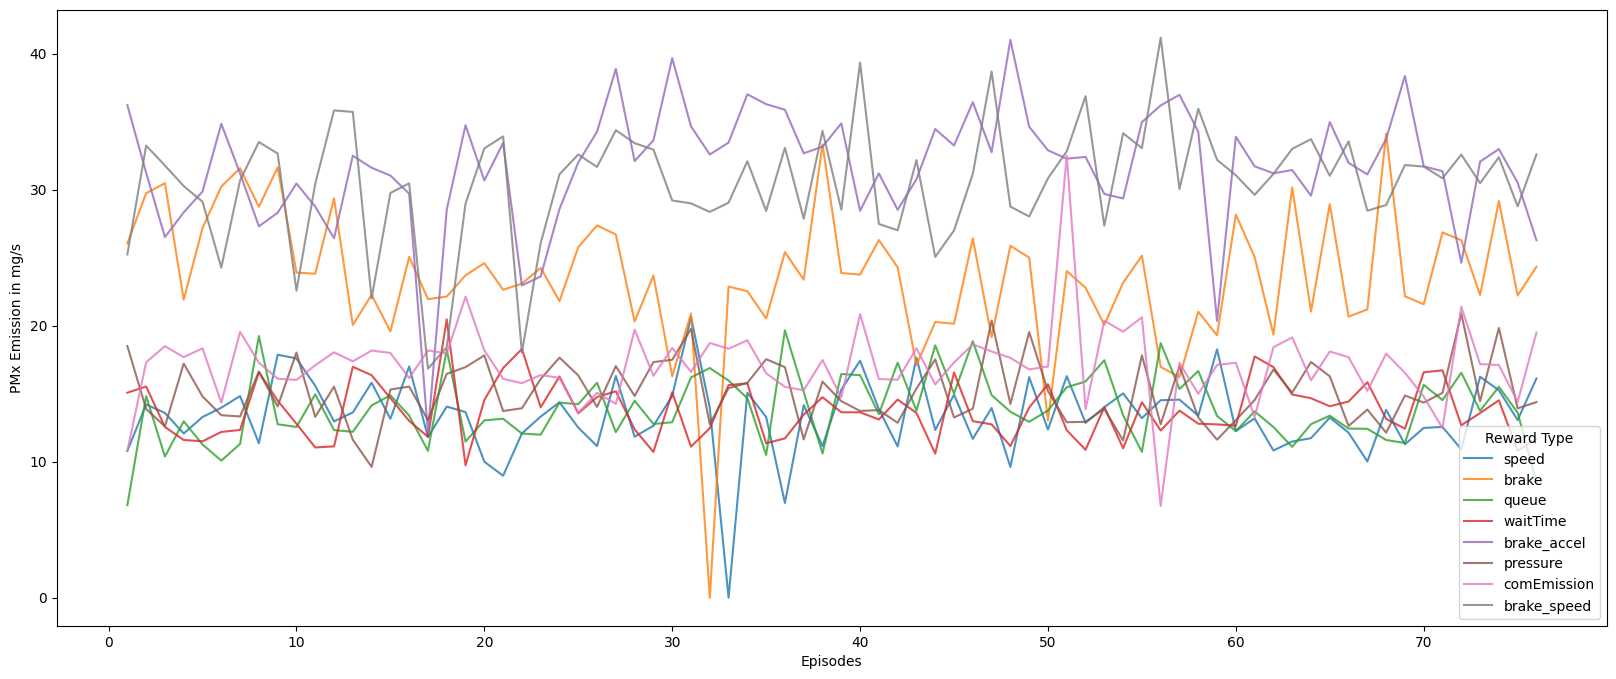

In [80]:
# get average CO2 emission across all episodes plot local CO2 emission for entire training process for each reward type in one figure
plt.figure(figsize=(20,8))

for column in local_PMx.columns:
       plt.plot(local_PMx.index, local_PMx[column], label=column, alpha=0.8)
       
plt.xlabel('Episodes')
plt.ylabel('PMx Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True)
plt.show()

In [81]:
# get mean of each reward types' average since the plots still overlap too much for clear identification

local_PMx.mean().sort_values()

speed          13.359396
waitTime       13.780198
queue          13.875763
pressure       15.116747
comEmission    17.136858
brake          23.575249
brake_speed    30.512780
brake_accel    31.680843
dtype: float64

##### NOx Comparison

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_8152/1292030661.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_NOx['speed'] = df_speed.groupby('episode').mean()['system_local_NOx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_8152/1292030661.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_NOx['brake'] = df_brake.groupby('episode').mean()['system_local_NOx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_8152/1292030661.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will

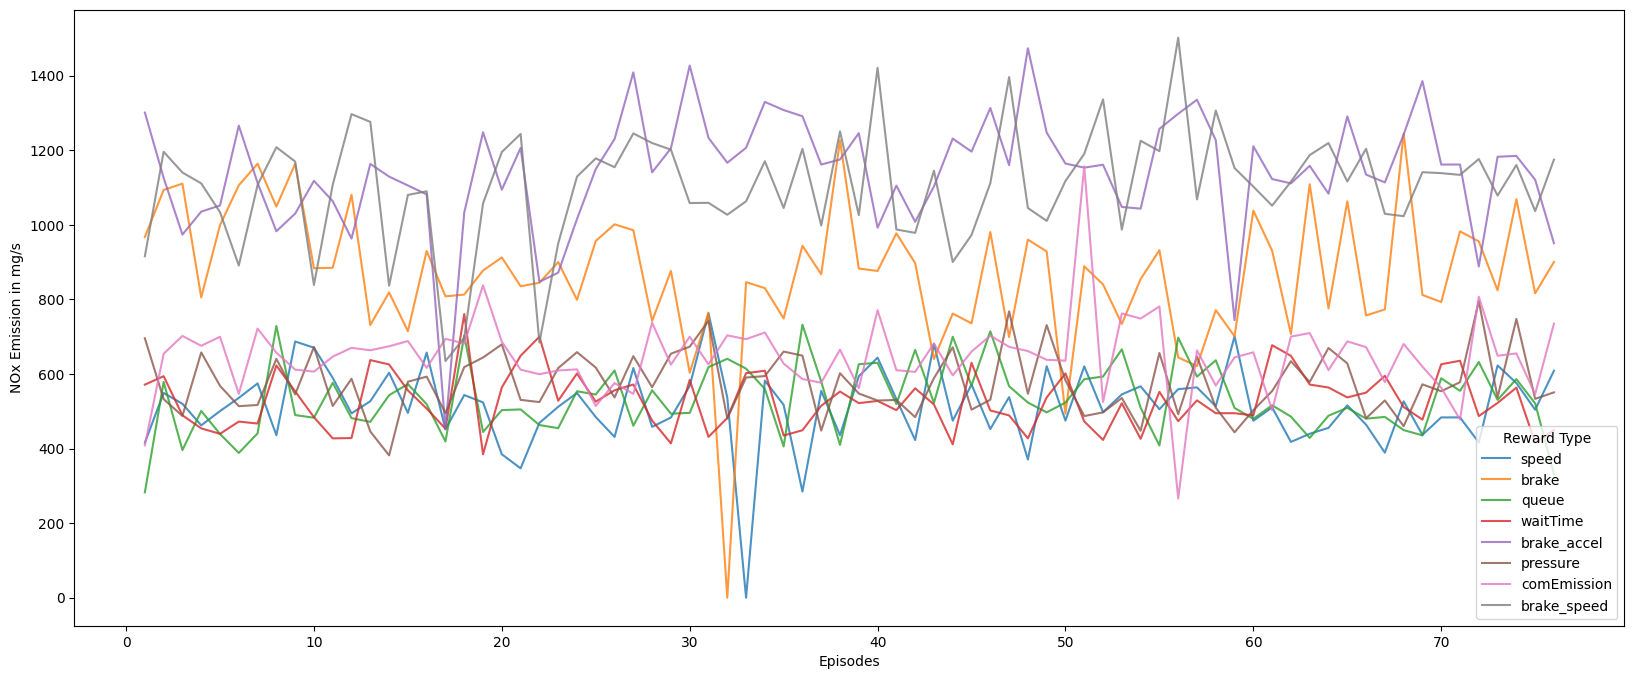

speed           513.075723
waitTime        527.836495
queue           531.861548
pressure        576.341227
comEmission     647.853656
brake           869.225734
brake_speed    1104.451712
brake_accel    1141.091242
dtype: float64


In [71]:
# new dataframe with local emissions for each reward type 

local_NOx = pd.DataFrame()

local_NOx['speed'] = df_speed.groupby('episode').mean()['system_local_NOx']
local_NOx['brake'] = df_brake.groupby('episode').mean()['system_local_NOx']
local_NOx['queue'] = df_queue.groupby('episode').mean()['system_local_NOx']
local_NOx['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_NOx']
local_NOx['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_NOx']
local_NOx['pressure'] = df_pressure.groupby('episode').mean()['system_local_NOx']
local_NOx['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_NOx']
local_NOx['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_NOx']

local_NOx.dropna(inplace=True) # drop empty episodes after 76

# get average CO2 emission across all episodes plot local CO2 emission for entire training process for each reward type in one figure
plt.figure(figsize=(20,8))

for column in local_NOx.columns:
       plt.plot(local_NOx.index, local_NOx[column], label=column, alpha=0.8)
       
plt.xlabel('Episodes')
plt.ylabel('NOx Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True)
plt.show()


# get mean of each reward types' average since the plots still overlap too much for clear identification
print(local_NOx.mean().sort_values())